In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import os
import numpy as np

In [ ]:
interim_path = os.path.join('drive','My Drive','Colab Notebooks','Interim')
print(os.listdir(interim_path))

['.ipynb_checkpoints', 'collected.jsonl', 'cleaned.jsonl']


In [ ]:
def transpose_file(file) -> dict:
  headers = defaultdict(list)

  with open(file, 'r') as f:
    for line in tqdm(f.readlines()):
      j_line = json.loads(line)
      for k in list(j_line.keys()):
        headers[k].append(j_line[k])
  
  return dict(headers)

def get_each_type(x: dict, typ: str) -> dict:
  a = {k: str(type(v[0])).split(' ')[1][:-1].replace("\'",'') for k,v in list(x.items())}
  return {k: v for k,v in a.items() if v == typ}

def plots(x: dict, col1: str, typ_plot: str, col2 = None, scale = True):

  xs = np.array(x[col1])
  if scale:
    xs = xs/abs(max(xs))

  if typ_plot == 'line':
    plt.plot(xs, label = col1)
  if typ_plot == 'scatter':
    r = list(range(len(xs)))
    plt.scatter(r, xs, label = col1)
  if typ_plot == 'hist':
    if scale:
      plt.hist(xs, bins=50, label=col1, range=[0,1])
    else:
      plt.hist(xs, bins =50, label=col1, range=[0, 50_000])
  if typ_plot == 'hist2d':
    assert type(col2) == str, "Column 2 must be a feature from the dictionary"
    ys = np.array(x[col2])

    if scale:
      ys = ys/abs(max(ys))
      plt.hist2d(xs, ys, range=[[0,1],[0, 1]], bins = 40)
      plt.xlabel(col1)
      plt.ylabel(col2)

  plt.legend()

In [ ]:
clean_path = os.path.join(interim_path, 'cleaned.jsonl')
trans_j = transpose_file(clean_path)

100%|██████████| 7/7 [00:00<00:00, 6472.69it/s]


In [ ]:
types = get_each_type(trans_j, 'int')
print(types)

{'favorite_count': 'int', 'followers': 'int', 'following': 'int', 'retweet_count': 'int', 'user_total_tweets': 'int'}


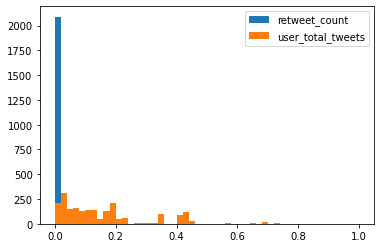

In [ ]:
for i in ['retweet_count','user_total_tweets']:
  plots(trans_j, i, 'hist')

No handles with labels found to put in legend.


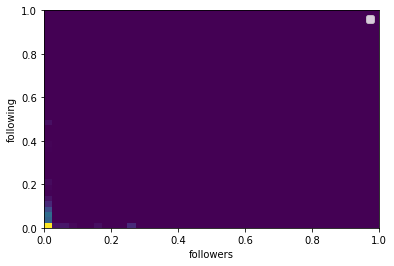

In [ ]:
plots(trans_j, 'followers', 'hist2d', 'following')

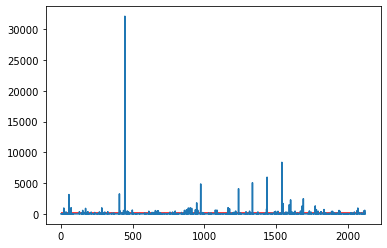

In [ ]:
xs = np.array(trans_j['retweet_count'])
y = sorted(xs)
h = y[int(0.95*len(y))]


plt.plot(xs)
plt.hlines(h, xmin = 0, xmax=len(y), color = 'red')
plt.show()

###Visualizing Distributions of Tweets By State